## This notebook is just to test the various functions of the project

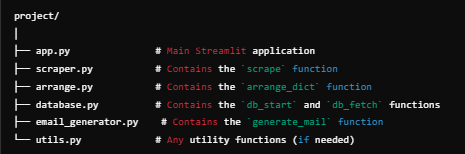

In [1]:
import streamlit as st
from scraper import scrape
from arrange import arrange_dict
from database import db_start, db_fetch
from email_generator import generate_mail
#=======

from langchain_community.document_loaders import WebBaseLoader
from langchain_core.prompts import PromptTemplate
from langchain_groq import ChatGroq
from langchain_core.output_parsers import JsonOutputParser
import pandas as pd
import uuid
import chromadb

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [2]:


# Initialize the ChatGroq model
llm = ChatGroq(
    model="mixtral-8x7b-32768",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    groq_api_key='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'
)



In [3]:
def main(job_link):
    # Step 1: Scrape job page content
    page_content = scrape(job_link)
    
    # Step 2: Process the scraped content to get job details
    job_data = arrange_dict(page_content,llm)
    
    # Step 3: Initialize ChromaDB
    collection = db_start()
    
    # Step 4: Fetch relevant portfolio links using skills from job_data
    fetched_links = db_fetch(collection, job_data['skills'])
    
    # Step 5: Generate email using the job data and fetched links
    email_output = generate_mail(job_data, fetched_links,llm)
    
    # Print the generated email output
    print(email_output)


In [5]:
# Test main():
#url="https://www.amazon.jobs/en/jobs/2783189/data-engineer-ii-amazon-jwo-tech?cmpid=SPLICX0248M&ss=paid&utm_campaign=cxro&utm_content=job_posting&utm_medium=social_media&utm_source=linkedin.com"
url="https://job-boards.greenhouse.io/aspire/jobs/5319109004?gh_src=499caf134us"
#url="https://www.google.com/about/careers/applications/jobs/results/115049310369784518-software-engineer/?src=Online/LinkedIn/linkedin_us&utm_source=linkedin&utm_medium=jobposting&utm_campaign=contract"
#url="https://careers.ibm.com/job/20893413/data-engineer-big-data-aws-bangalore-in/?codes=SN_LinkedIn&Codes=SN_LinkedIn"
main(url)

Subject: Seamless Data Engineering Solutions for Aspire from AtliQ

Dear Hiring Manager,

I hope this email finds you well. I came across the Data Engineer Intern position at Aspire and noticed the emphasis on data infrastructure, extraction, transformation, and quality. As a Business Development Executive at AtliQ, I am excited to share how our expertise in AI & Software Consulting can help fulfill your needs.

AtliQ has a proven track record of delivering tailored data engineering solutions that drive scalability, process optimization, cost reduction, and overall efficiency. Our portfolio includes successful projects utilizing Python, SQL, and relational databases, which are key skills required for the role. You can find our relevant work here: <https://example.com/ml-python-portfolio> and <https://example.com/python-portfolio>.

Our team excels in:

1. Designing, developing, and maintaining data pipelines using Python.
2. Integrating various data sources using tools like Airbyte.
3.

In [2]:
!streamlit run app.py

^C
